Ayudantia 26/03 Bisección y Punto Fijo \\
Ante cualquier consulta o posible correccion mandar correo a tito.orellana@usm.cl \\
Ejercicio 1:
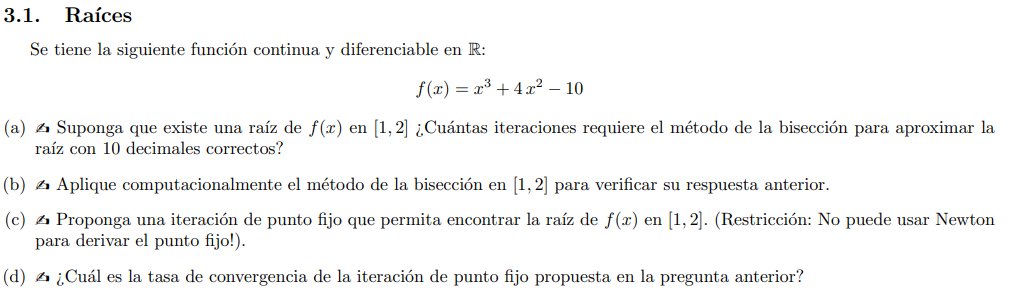

a) Conocemos de antemano la siguiente definición del apunte para el metodo de la biseccion: \\
Se definirá que una solución es correcta en $p$ decimales si el error absoluto es menor que $0.5 · 10^{-p}$

\begin{equation}
    \frac{b-a}{2^{n+1}} < 0.5·10^{-p}
\end{equation}

Para calcular el numero de iteraciones para $p = 10$, y un dominio [1,2]:

\begin{equation}
    \frac{2-1}{2^{n+1}} < 0.5·10^{-10}
\end{equation}

\begin{equation}
    1 < 2^{n+1}·2^{-1}·10^{-10}
\end{equation}

\begin{equation}
    10^{10} < 2^{n}
\end{equation}

Aplicando $log_2$

\begin{equation}
    log_2(10^{10}) < log_2(2^{n})
\end{equation}

\begin{equation}
    10·log_2(10) < n
\end{equation}

donde $log_2(10) \approx 3.32$, por lo tanto:

\begin{equation}
    10·3.32 < n
\end{equation}

\begin{equation}
    33.2 < n
\end{equation}

Por lo cual necesitamos aprox 34 iteraciones (el siguiente valor entero mayor a 33.2) para obtener 10 decimales correctos.

b) A continuacion se presenta el codigo de la bisección con una tolerancia de $1e-10$ que equivale aproximadamente a 10 decimales:

In [1]:
import numpy as np

def bisection(f, a, b, iter, tol=1e-10):
  fa,fb = f(a),f(b)
  if np.sign(fa*fb) > 0:
    return None
  iter = 0
  while( (b-a)/2 > tol):
    c = (a+b)/2
    fc = f(c)
    if fc == 0:
      break
    elif np.sign(fa*fc) < 0:
      b = c
      fb = fc
    else:
      a = c
      fa = fc
    iter+=1
  print("Iteraciones:",iter)
  r = (a + b)/2
  return r

f = lambda x: np.power(x,3) + 4*np.power(x,2) - 10
r = (bisection(f, 1, 2, 1))
print(r)



Iteraciones: 33
1.36523001344176


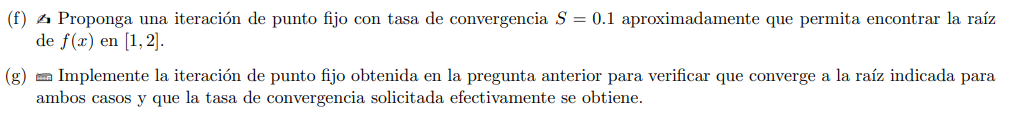

A continuación se presentan 3 puntos fijos con distintas tasas de convergencia: \\
1)

\begin{equation}
    f(x) = x^3+ 4x^2 - 10
\end{equation}

despejando el termino al cuadrado:

\begin{equation}
     4x^2 = 10 - x^3
\end{equation}

\begin{equation}
     x^2 = \frac{10 - x^3}{4}
\end{equation}

\begin{equation}
     x = \frac{\sqrt{10 - x^3}}{2}
\end{equation}

\begin{equation}
     g1(x) = \frac{\sqrt{10 - x^3}}{2}
\end{equation}

2)

\begin{equation}
    f(x) = x^3+ 4x^2 - 10
\end{equation}

despejando el termino al cubo:

\begin{equation}
    x^3 = -4x^2 + 10
\end{equation}

\begin{equation}
    x= \sqrt[3]{10-4x^2}
\end{equation}

\begin{equation}
    g2(x)= \sqrt[3]{10-4x^2}
\end{equation}

3) Una forma de generar puntos fijo con la tasa de convergencia que uno desee:
\\
sea:

\begin{equation}
    f(r)=0
\end{equation}

multiplicando ambos lados por $\alpha$

\begin{equation}
    \alpha f(r)=0
\end{equation}

sumando r

\begin{equation}
    \alpha f(r) + r=r
\end{equation}

\begin{equation}
    g(r) = \alpha f(r) + r
\end{equation}

derivamos para poder encontrar la tasa de convergencia en funcion de $\alpha$:

\begin{equation}
    g'(r) = \alpha f'(r) + 1
\end{equation}

\begin{equation}
    |\alpha f'(r) + 1| = S
\end{equation}

(analizaremos el caso positivo pero el negativo tambien da un valor valido de $\alpha$ para obtener un S.)

\begin{equation}
    \alpha  = \frac{S - 1}{f'(r)}
\end{equation}

De esta forma se puede obtener un valor de $\alpha$ segun la tasa de convergencia que deseamos que tenga nuestro punto fijo, en este ejercicio se pide plantear un punto fijo con tasa 0.1, por lo tanto, reemplazando S = 0.1.

\begin{equation}
    \alpha  = \frac{0.1 - 1}{f'(r)}
\end{equation}

\begin{equation}
    \alpha  = \frac{-0.9}{f'(r)}
\end{equation}

Por lo tanto, nuestro punto fijo queda de la forma:

\begin{equation}
    g3(r) = -0.9\frac{f(x)}{f'(r)}  + r
\end{equation}

Donde:
\begin{equation}
    f(x) = x^3+ 4x^2 - 10
\end{equation}

\begin{equation}
    f'(x) = 3x^2+ 8x
\end{equation}

De esta forma, se han planteado 3 puntos fijos distintos para una misma funcion, los cuales se presentan en el codigo de abajo junto a sus derivadas, para que pueda revisar sus tasas de convergencia y como se comportan.





In [ ]:
f = lambda x: np.power(x,3) + 4*np.power(x,2) - 10
fp = lambda x: 3*np.power(x,2) + 8*x
fpp = lambda x: 6*x + 8

g1 = lambda x: (np.sqrt(10-np.power(x,3)))*(1/2)
g1p = lambda x: (1/4)*np.power((10-np.power(x,3)),(-1/2))*(-3*np.power(x,2))

g2 = lambda x: np.power((-4)*np.power(x,2)+10,(1/3))
g2p = lambda x: (-1/3)*np.power((10-(np.power(x,2)*4)),(-2/4))*(8*x)

g3= lambda x: -0.9*f(x)/fp(x) + x
g3p = lambda x: -0.9*(np.power(fp(x),2) + 0.9*f(x)*fpp(x))/(np.power(fp(x),2)) + 1

xi = 1.0
while _ in np.arange(10):
  xi = g3(xi)
  print(xi)

print("R=",r)
print("S=",g1p(r))

R= 1.36523001344176
S= -0.5119612550563447


Ejercicio 2 correpsonde a ejercicio [3.7 Triple-root-one Guia_C1_2025_1 ](https://usmcl-my.sharepoint.com/personal/claudio_torres_usm_cl/Documents/INF-285/ScientificComputing_SharedFolder_2025-1/03%20Gu%C3%ADas%20para%20cert%C3%A1menes/Gu%C3%ADa_C1_2025_1.pdf?CT=1743818110583&OR=ItemsView#page=20&zoom=100,37,558)